# Asgmt: Polynomial Regression using Housing.csv

## Importing the libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [73]:
dataset = pd.read_csv('housing.csv')

X = dataset.drop(columns=['median_house_value']).values     # features
y = dataset['median_house_value'].values                    # target

In [74]:
print(X)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


In [75]:
print(y)

[452600 358500 352100 ...  92300  84700  89400]


In [76]:
y = np.array(y) #convert y to numpy array

In [77]:
print(y)

[452600 358500 352100 ...  92300  84700  89400]


## Handle Nan Value

In [78]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [79]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median())


missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## One Hot Encoder


In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

# Handle NaN for the categorical column before encoding
dataset.iloc[:, 8] = dataset.iloc[:, 8].fillna('Unknown') 

# OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough') 
X = np.array(ct.fit_transform(X))

# Fill any remaining NaN after encoding
X = pd.DataFrame(X).fillna(0).values # fill any NaN values with 0 for after encoding


C:\Users\KimieCrafter\AppData\Local\Temp\ipykernel_8796\561662419.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = pd.DataFrame(X).fillna(0).values


## Training the Linear Regression model on the whole dataset

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) 

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2) # degree is the power of the polynomial
X_poly = poly_reg.fit_transform(X) # this will transform the X into X^2, X^3, X^4
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Predicting a new result with Linear Regression

In [83]:
y_pred = lin_reg.predict(X)

In [84]:
#To get Performance Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


R-squared: 0.6448
MAE: 49929.72
RMSE: 68775.46


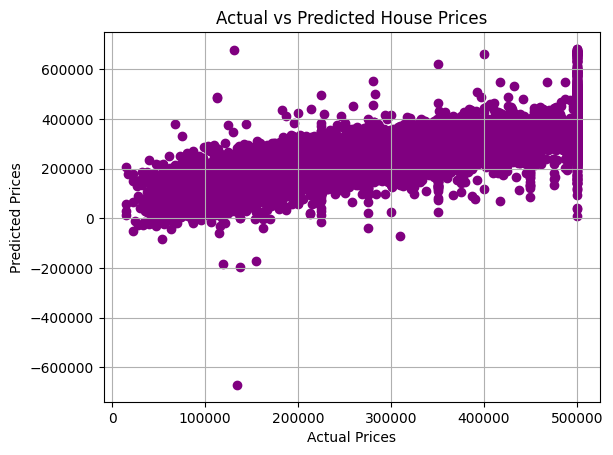

In [85]:
# Visualizing the Linear Regression results

plt.scatter(y, y_pred, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


## Predicting a new result with Polynomial Regression

In [86]:
y_pred = lin_reg_2.predict(X_poly)

In [87]:
#To get Performance Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.7103
MAE: 44215.20
RMSE: 62113.01


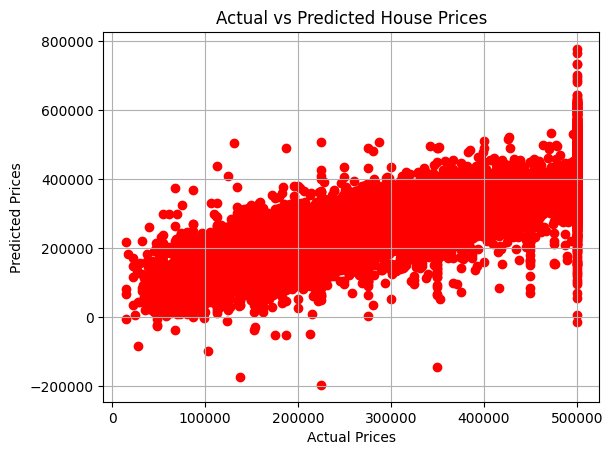

In [88]:
# Visualizing the Polynomial Regression results

plt.scatter(y, y_pred, color='Red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

On high Price the model is a bit struggle!